In [1]:
using PyPlot

# Aufgabe 1

### benötigte Funktionen

In [2]:
function FTCS(t, x, start)
    l_t = length(t)
    Delta_t = (t[l_t]-t[1])/(l_t-1)
    l_x = length(x)
    Delta_x = (x[l_x]-x[1])/(l_x-1)
    u = Array(Float64, l_x, l_t)
    u[:,1] = start
    for t_i in 1:l_t-1
        u[1, t_i+1] = u[1, t_i]
        u[l_x, t_i+1] = u[l_x, t_i]
        for x_i in 2:l_x-1
            u[x_i, t_i+1] = u[x_i, t_i] + Delta_t/Delta_x^2 * (u[x_i+1, t_i]+u[x_i-1, t_i]-2*u[x_i, t_i])
        end
    end
    return u
end;

### Aufgabe

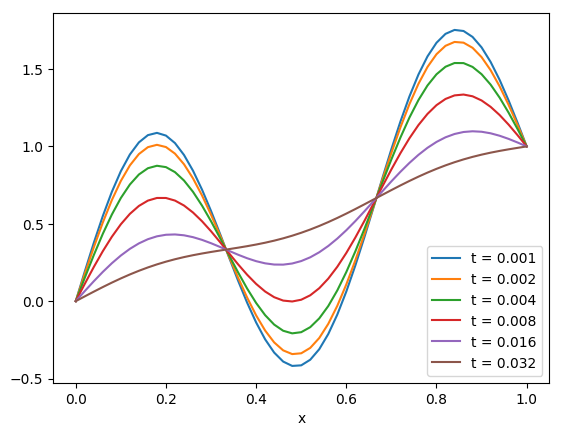

In [3]:
Delta_x = .02
Delta_t = .25*Delta_x^2
n = 5
x = linspace(0, 1, Int(1/Delta_x)+1)
t = linspace(0, 1e-3*2^n, Int(1e-3*2^n/Delta_t)+1)
start =[sin(3*pi*i)+i for i in x]
result = FTCS(t, x, start)
t_list = [1e-3*2^i for i in 0:n]
for t_i in t_list
    index = findfirst(t, t_i)
    plot(x, result[:,index], label="t = $t_i")
end
xlabel("x")
legend()
show()

# Aufgabe 2

### benötigte Funktionen

In [4]:
function rho(X, Y)
    l_X = length(X)
    l_Y = length(Y)
    mesh = zeros(Float64, l_X, l_Y)
    for i_x in 2:l_X-1
        for i_y in 2:l_Y-1
            mesh[i_x,i_y] = e^-((X[i_x]-2)^2+Y[i_y]^2)-e^-((X[i_x]+2)^2+Y[i_y]^2)
        end
    end
    return mesh
end;

function relax(Phi, rho, p, dx, k_max)
    f = Array{Float64}(k_max)
    dimx = size(Phi)[1]
    dimy = size(Phi)[2]
    for k in 1:k_max
        Phi_neu = zeros(Phi)
        for x in 2:dimx-1
            for y in 2:dimy-1
                Phi_neu[x, y] = p*(pi*dx^2*rho[x,y]+.25*(Phi[x+1,y]+Phi[x-1,y]+Phi[x,y+1]+Phi[x,y-1]))+(1-p)*Phi[x,y]
            end
        end
        f[k] = sum(abs(Phi_neu-Phi))
        Phi = Phi_neu
    end
    return (Phi, f)
end;

### Teilaufgabe a

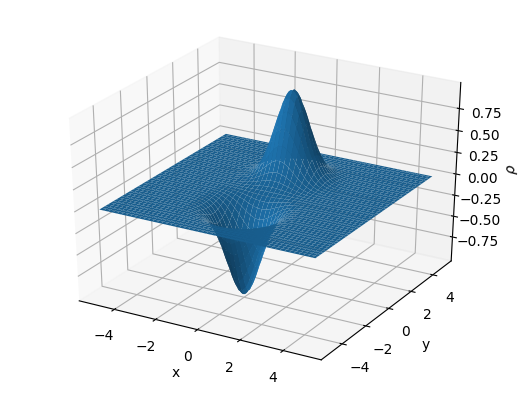

In [5]:
resolution = .01
x = linspace(-5,5,Int(10/resolution)+1)
y = linspace(-5,5,Int(10/resolution)+1)
X = repeat(x', outer=[length(x),1])
Y = repeat(y, outer=[1,length(y)])
Z = rho(x,y)

plot_surface(X,Y,Z)
xlabel("x")
ylabel("y")
zlabel("\$\\rho\$")
show()

### Teilaufgabe b

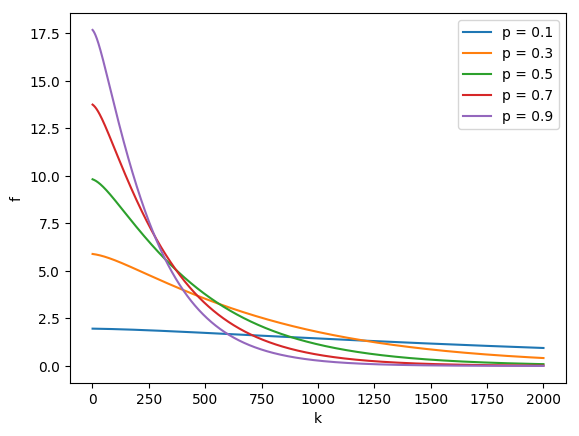

In [6]:
resolution = .2
x = linspace(-5,5,Int(10/resolution)+1)
y = linspace(-5,5,Int(10/resolution)+1)
rho_ = rho(x,y)
Phi = zeros(rho_)
for p in [.1,.3,.5,.7,.9]
    (Phi_i, f_i) = relax(Phi, rho_, p, resolution, 2000)
    plot(1:2000, f_i, label="p = $p")
end
xlabel("k")
ylabel("f")
legend()
show()

### Teilaufgabe c

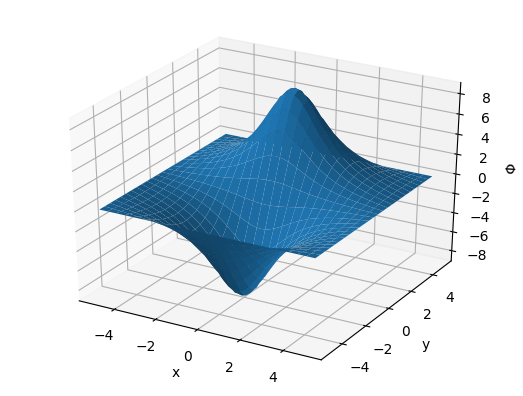

In [7]:
resolution = .2
x = linspace(-5,5,Int(10/resolution)+1)
y = linspace(-5,5,Int(10/resolution)+1)
X = repeat(x', outer=[length(x),1])
Y = repeat(y, outer=[1,length(y)])
rho_ = rho(x,y)
Phi = zeros(rho_)
(Z, f_i) = relax(Phi, rho_, .5, resolution, 2000)

plot_surface(X,Y,Z)
xlabel("x")
ylabel("y")
zlabel("\$\\Phi\$")
show()

# Aufgabe 3

### benötigte Funktionen

In [8]:
function sym_ones(n,x)
    if ! (x in 1:n)
        error("x should be between 1 and n")
    end
    return hcat(zeros(n,x),eye(n,n-x)) + vcat(zeros(x,n),eye(n-x,n))
end;
function matrixA(n)
    return sym_ones(n, 1)
end;
function matrixB(n)
    out = zeros(n,n)
    for i in 1:n-1
        out += i*sym_ones(n, i)
    end
    return out
end;

### Teilaufgabe a

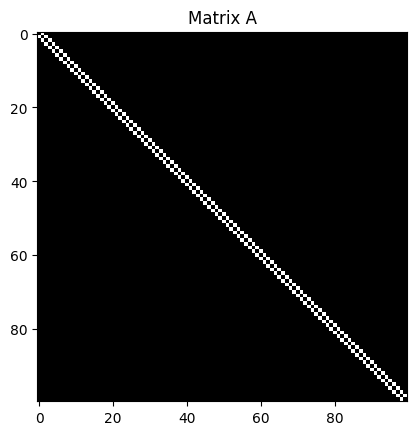

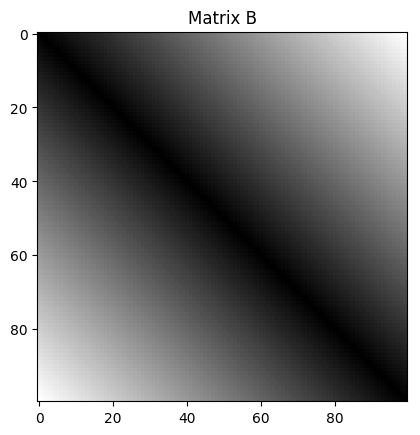

In [9]:
figure(1)
imshow(matrixA(100), cmap="gray", interpolation="none")
title("Matrix A")
figure(2)
imshow(matrixB(100), cmap="gray", interpolation="none")
title("Matrix B")
show()

### Teilaufgabe b

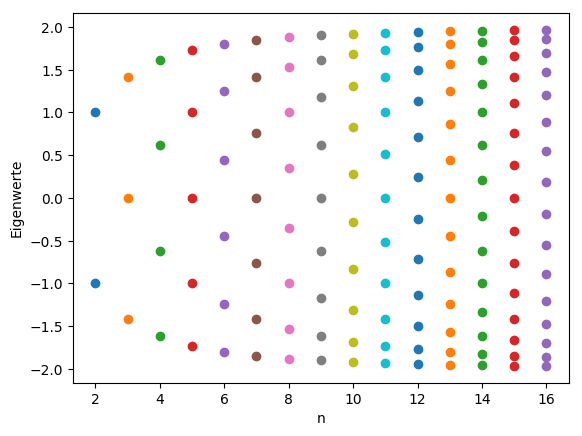

In [10]:
for i in 2:16
    plot(fill(i, i), eigvals(matrixA(i)), "o")
end
xlabel("n")
ylabel("Eigenwerte")
show()

### Teilaufgabe c

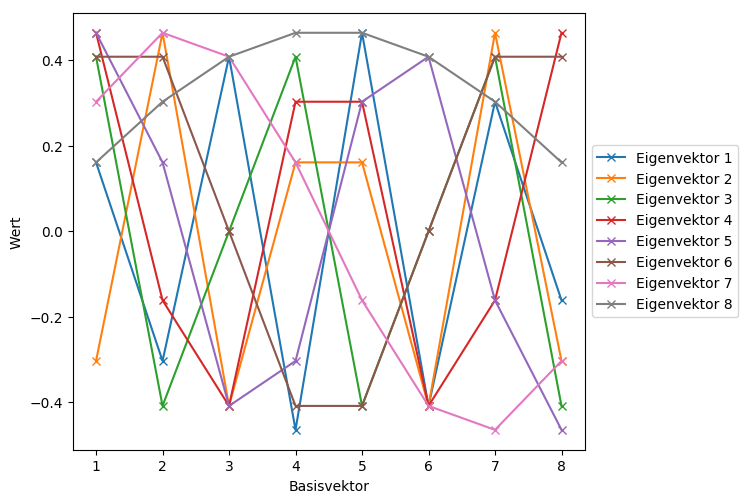

In [11]:
ev = eigvecs(matrixA(8))
for i in 1:8
    plot(1:8, ev[:,i], "-x", label="Eigenvektor $i")
end
ax = gca()
ax[:set_position]([0.06,0.06,0.8,0.91])
xlabel("Basisvektor")
ylabel("Wert")
legend(loc="center left", bbox_to_anchor=(1, 0.5))
show()